Detected temperatures: ['254.1', '263.1', '268.1', '277.1', '284.5', '295.1', '307', '312', '323.7', '334.1', '342.7', '354.8', '365.9'], 13 temperatures found.
Data starts at line index: 6
[Saved] ./plots/g_OO(r)-SkinnerBenmore2014.csv


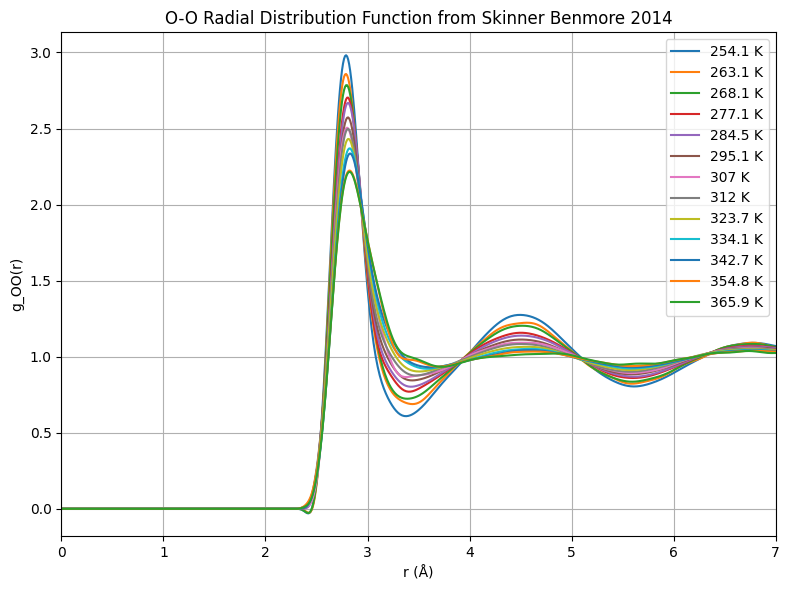

In [11]:
import pandas as pd
import re
import os

# 输入文件路径
input_file = "./plots/g_OO(r)-Skinner Benmore 2014.txt"

# 读取数据（跳过注释行）
with open(input_file, "r") as f:
    lines = [line for line in f.readlines() if not line.startswith("#") and line.strip() and not line.startswith("\"#")]

# 找到列标题行（含 "T(K)"）
header_line = next(line for line in lines if line.startswith("T(K)"))
header_parts = header_line.strip().split()

# 提取温度列
temps = re.findall(r"([\d\.]+)", header_line)
print(f"Detected temperatures: {temps}, {len(temps)} temperatures found.")

# 找到数据起始行（含 'r'）
data_start_idx = 6
print(f"Data starts at line index: {data_start_idx}")
r_values: list[float] = []
g_by_temp: dict[float, list[float]] = {t: [] for t in temps}
with open(input_file, "r") as f:
    all_lines = f.readlines()
    all_lines = all_lines[data_start_idx:]
    for line in all_lines:
        splited_line = line.strip().split()
        if len(splited_line) == 0:
            continue
        r_values.append(float(splited_line[0]))
        for i, t in enumerate(temps):
            g_by_temp[t].append(float(splited_line[2*i + 1]))
df = pd.DataFrame({"r_values": r_values})
for t in temps:
    df[f"{t}K-g_oo"] = g_by_temp[t]

# 汇总 CSV
all_csv = os.path.join("./plots", "g_OO(r)-SkinnerBenmore2014.csv")
df.to_csv(all_csv, index=False)
print(f"[Saved] {all_csv}")


import matplotlib.pyplot as plt

# plot rdf of all temperatures
plt.figure(figsize=(8, 6))
for t in temps:
    plt.plot(df["r_values"], df[f"{t}K-g_oo"], label=f"{t} K")
plt.xlabel("r (Å)")
plt.ylabel("g_OO(r)")
plt.title("O-O Radial Distribution Function from Skinner Benmore 2014")
plt.xlim(0, 7)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()